#ส่วนของการ train ติดตั้ง Library ที่จำเป็น

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 126.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


#โหลด Dataset จาก Roboflow

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0100tTC6iSisNdselYOb")
project = rf.workspace("augmented-startups").project("playing-cards-ow27d")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Playing-Cards-4 in yolov8:: 100%|██████████| 48478/48478 [00:15<00:00, 3185.06it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#  Train Model Yolo ด้วย Dataset ที่เตรียมไว้

In [ ]:
from ultralytics import YOLO

# โหลดโมเดล
model = YOLO("yolov8s.pt")

# เทรนพร้อม custom augmentation
model.train(
    data="/content/Playing-Cards-4/data.yaml",
    epochs=30,
    imgsz=640,
    augment=True,  # เปิดใช้ augmentation
    degrees=20,    # หมุน
    scale=0.5,     # random scale
    flipud=0.3,    # flip vertical
    fliplr=0.5,    # flip horizontal
    hsv_h=0.015,   # ปรับ hue
    hsv_s=0.7,     # ปรับ saturation
    hsv_v=0.4      # ปรับ brightness
)


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Playing-Cards-4/data.yaml, degrees=20, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.3, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798857652ea0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

#โหลด model แบบบลดขนาด

In [ ]:
from ultralytics import YOLO

# โหลดโมเดลที่ train เสร็จ
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Export เป็น ONNX
model.export(format="onnx", opset=12)

# Export เป็น TFLite แบบ quantized INT8
model.export(format="tflite", int8=True)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 11,145,708 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1rc1 opset 12...
ONNX: slimming with onnxslim 0.1.69...
ONNX: export success ✅ 8.0s, saved as '/content/runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (9.0s)
Results saved to /content/runs/detect/train/weights
Predict:       

'/content/runs/detect/train/weights/best_saved_model/best_int8.tflite'

#เช็ต parameters

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
total_params = sum(p.numel() for p in model.model.parameters())
print(f"Total parameters: {total_params/1e6:.2f} M")

Total parameters: 11.16 M


#แสดงผลลัพธ์จากการ Train Model





##แสดง Confusion Metrix

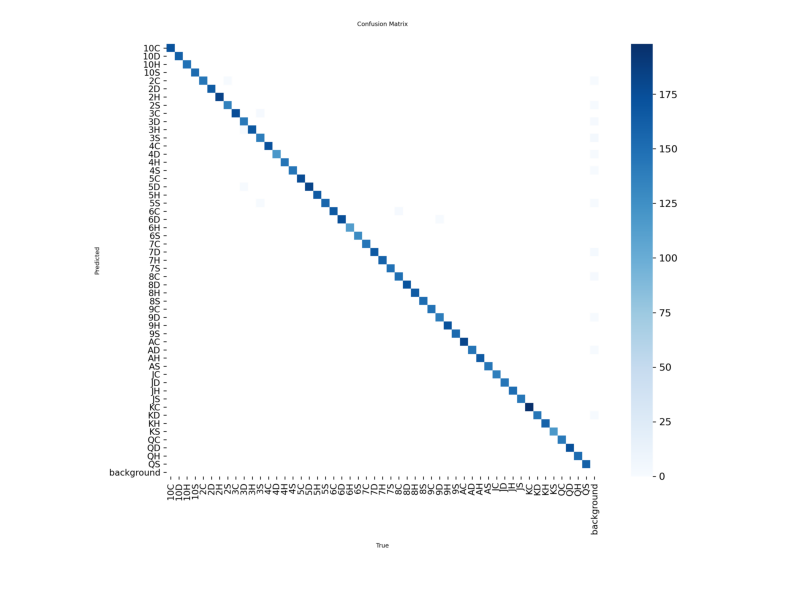

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/runs/detect/train/confusion_matrix.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()

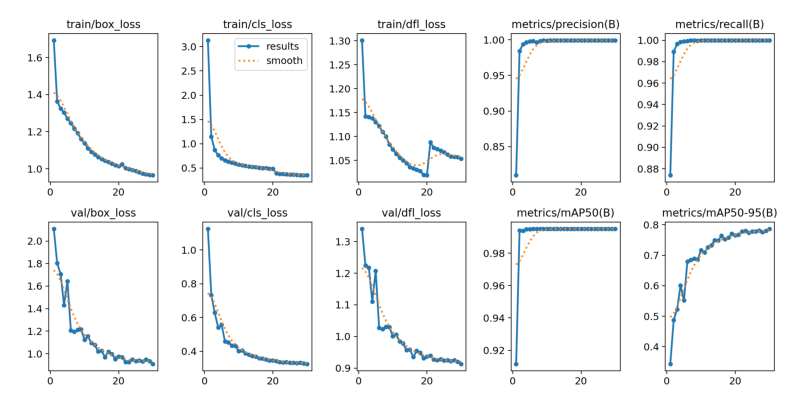

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/runs/detect/train/results.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()

##แสดงภาพตัวอย่างที่ทำนายแล้ว จากการ Valid

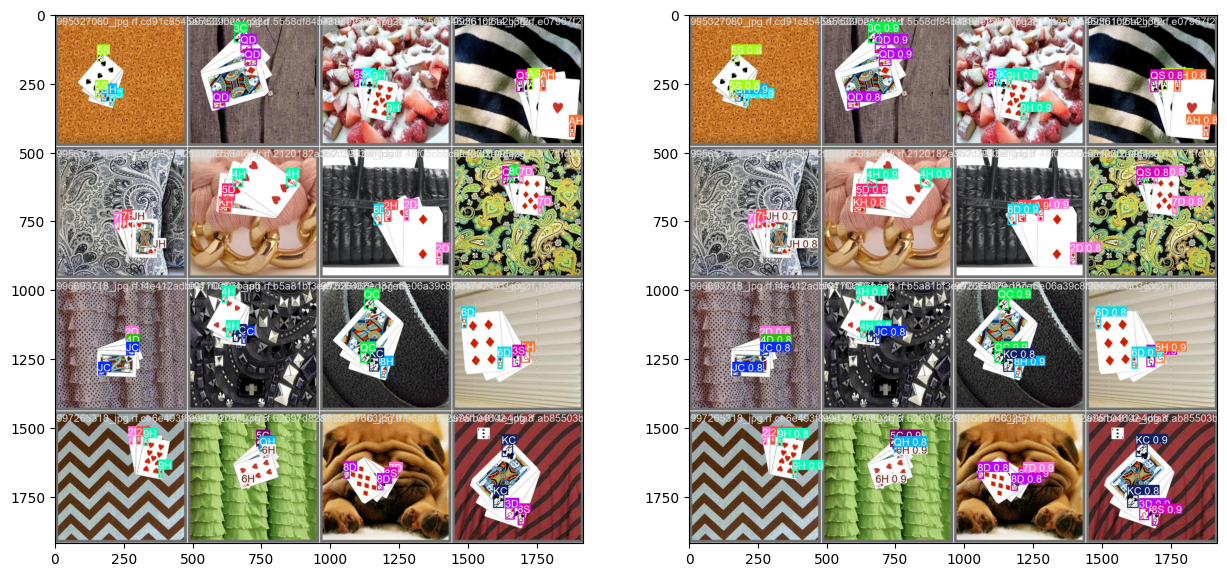

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# โหลดรูป
img_left = mpimg.imread('/content/runs/detect/train/val_batch0_labels.jpg')
img_right = mpimg.imread('/content/runs/detect/train/val_batch0_pred.jpg')

plt.figure(figsize=(15, 15))  # กำหนดขนาดรวม

# รูปซ้าย (index=1)
plt.subplot(1, 2, 1)
plt.imshow(img_left)
plt.axis("on")

# รูปขวา (index=2)
plt.subplot(1, 2, 2)
plt.imshow(img_right)
plt.axis("on")

plt.show()

#ดาวน์โหลด Model ไปใช้

In [ ]:
from google.colab import files
# ระบุเส้นทางของไฟล์ที่ต้องการดาวน์โหลด
file_path ='/content/runs/detect/train2/weights/best.pt'
# ดาวน์โหลดไฟล์
files.download(file_path)

#ส่วนของการ test ลอง Inferrence


# การนำโมเดลที่สำเร็จแล้วมาใช้ (ใน Colab)

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model_best_pt="/content/best.pt"

In [ ]:
# โหลดโมเดล best
model_path = model_best_pt
model = YOLO(model_path)

In [ ]:
model.info()

In [ ]:
from ultralytics import YOLO
import os
import cv2
from google.colab.patches import cv2_imshow # จำเป็นสำหรับการแสดงผลใน Google Colab

# ----------------------------------------------------
#  สำคัญ: โค้ดส่วนนี้ต้องรันนอกฟังก์ชัน
# ----------------------------------------------------
# 1. กำหนดและโหลดโมเดล
model_path = model_best_pt # <<< ตรวจสอบ/เปลี่ยนพาธโมเดลของคุณ

if not os.path.exists(model_path):
    print(f"กำลังใช้โมเดลตั้งต้น: {model_path} (จะถูกดาวน์โหลดหากยังไม่มี)")
try:
    model = YOLO(model_path)
except Exception as e:
    print(f"Error: ไม่สามารถโหลดโมเดล YOLO จาก {model_path} ได้")
    model = None # ตั้งให้เป็น None เพื่อป้องกัน Error ในฟังก์ชัน

# ----------------------------------------------------
# ฟังก์ชันหลักสำหรับการรัน Inference, ดึงข้อมูล และแสดงผล
# ----------------------------------------------------
def run_yolo_inference_and_display(file_path, model, conf_thres=0.50, iou_thres=0.45, show_interval=30):
    """
    รัน Inference และดึงข้อมูลการตรวจจับแบบละเอียด พร้อมแสดงผลการวาดกล่องใน Colab

    Args:
        file_path (str/int): พาธไฟล์ภาพ/วิดีโอ หรือ ID กล้อง (เช่น 0)
        model (YOLO): วัตถุโมเดล YOLO ที่โหลดไว้
        conf_thres (float): Confidence threshold
        iou_thres (float): IoU threshold
        show_interval (int): แสดงผลเฟรมที่ถูกวาดทุกๆ N เฟรม (ช่วยป้องกัน Notebook ค้าง)

    Returns:
        list: รายการของข้อมูลการตรวจจับทั้งหมดในทุกเฟรม
    """

    if model is None:
        print(" โมเดลยังไม่ได้ถูกโหลด กรุณาตรวจสอบ model_path")
        return []

    # ตรวจสอบพาธ
    if isinstance(file_path, str) and not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found at {file_path}")

    print(f" กำลังประมวลผล: {file_path} (ดึงข้อมูลดิบ + แสดงผล)")

    # รัน Prediction โดยใช้ stream=True
    results_generator = model.predict(
        source=file_path,
        conf=conf_thres,
        iou=iou_thres,
        show=False,          # ปิด show=False ที่นี่ แล้วไปใช้ cv2_imshow แทน
        stream=True,
        save=True,
        project='/content/Video_Detection', # ตัวอย่างพาธตามที่คุณต้องการ
        name='YOLO_Output',                  # โฟลเดอร์ชื่อเดียวเสมอ
        exist_ok=True,
    )

    all_detection_data = []
    frame_index = 0

    # วนลูปเพื่อดึงข้อมูลทีละเฟรม
    for result in results_generator:

        # 1. ดึงข้อมูลดิบ (Detection Data)
        boxes = result.boxes
        frame_data = {
            "frame_id": frame_index,
            "detections": []
        }

        if boxes is not None and len(boxes) > 0:
            # ใช้ .cpu().numpy() เพื่อดึงข้อมูลออกจาก Tensor
            xyxy_coords = boxes.xyxy.cpu().numpy()
            confidences = boxes.conf.cpu().numpy()
            class_ids = boxes.cls.cpu().numpy().astype(int)

            for box, conf, cls_id in zip(xyxy_coords, confidences, class_ids):
                detection = {
                    "class_id": cls_id.item(),
                    "class_name": model.names[cls_id.item()],
                    "confidence": float(f"{conf:.4f}"),  # ค่าความแม่นยำ
                    "bbox_xyxy": [float(f"{c:.2f}") for c in box], # พิกัดกล่อง
                }
                frame_data["detections"].append(detection)

        # 2. แสดงผลข้อมูลดิบ (สำหรับส่งไปหน้าเว็บ)
        if frame_index % show_interval == 0:
            print(f"\n--- [Frame {frame_index}] DATA ({len(frame_data['detections'])} Detections) ---")
            for det in frame_data["detections"]:
                # ข้อมูลนี้คือสิ่งที่คุณจะใช้บนเว็บไซต์
                print(f"  > Class: {det['class_name']} | Conf: {det['confidence']} | BBox: {det['bbox_xyxy']}")

        # 3. วาดผลลัพธ์ (Prediction Visuals)
        # result.plot() คืนค่า annotated frame (เป็น numpy array/image)
        annotated_frame = result.plot()

        # 4. แสดงผลใน Colab/Jupyter (ใช้ cv2_imshow)
        if frame_index % show_interval == 0:
            # แสดงภาพที่วาดกล่องแล้ว
            cv2_imshow(annotated_frame)

        all_detection_data.append(frame_data)
        frame_index += 1

        # สำคัญ: cv2.waitKey(1) จำเป็นสำหรับ Real-time streams
        if isinstance(file_path, int):
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    print(" การประมวลผลเสร็จสมบูรณ์")
    return all_detection_data

# ----------------------------------------------------
# 5. ส่วนการเรียกใช้งาน (รันโค้ดนี้)
# ----------------------------------------------------

# กำหนดไฟล์อินพุต
file_path = "/content/3693458-uhd_2160_3240_24fps.mp4" # <-- วิดีโอ
#file_path = 0 # <-- สำหรับ Webcam

if 'model' in locals() and model:
    detection_results = run_yolo_inference_and_display(
        file_path=file_path,
        model=model,
        conf_thres=0.50,
        show_interval=30 # แสดงภาพวาดทุกๆ 30 เฟรม (1 วินาที ที่ 30fps)
    )
else:
    print(" ไม่สามารถรันได้เนื่องจากโมเดลยังไม่ได้ถูกโหลด โปรดตรวจสอบ 'model_path' และรันส่วนโหลดโมเดล")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# แปลง detection_results เป็น DataFrame
rows = []
for frame in detection_results:
    for det in frame["detections"]:
        rows.append({
            "frame_id": frame["frame_id"],
            "class_name": det["class_name"],
            "confidence": det["confidence"]
        })

df = pd.DataFrame(rows)

# ดูข้อมูลตัวอย่าง
print(df.head())

# 🔹 วาดกราฟ Confidence ต่อเฟรม
plt.figure(figsize=(12,6))
for class_name in df["class_name"].unique():
    subset = df[df["class_name"] == class_name]
    plt.plot(subset["frame_id"], subset["confidence"], marker="o", label=f"{class_name}")

plt.title("Confidence per Frame by Class")
plt.xlabel("Frame ID")
plt.ylabel("Confidence")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(model.names)

{0: '10C', 1: '10D', 2: '10H', 3: '10S', 4: '2C', 5: '2D', 6: '2H', 7: '2S', 8: '3C', 9: '3D', 10: '3H', 11: '3S', 12: '4C', 13: '4D', 14: '4H', 15: '4S', 16: '5C', 17: '5D', 18: '5H', 19: '5S', 20: '6C', 21: '6D', 22: '6H', 23: '6S', 24: '7C', 25: '7D', 26: '7H', 27: '7S', 28: '8C', 29: '8D', 30: '8H', 31: '8S', 32: '9C', 33: '9D', 34: '9H', 35: '9S', 36: 'AC', 37: 'AD', 38: 'AH', 39: 'AS', 40: 'JC', 41: 'JD', 42: 'JH', 43: 'JS', 44: 'KC', 45: 'KD', 46: 'KH', 47: 'KS', 48: 'QC', 49: 'QD', 50: 'QH', 51: 'QS'}


In [ ]:
#print(model.model)   # โครงสร้างเป็น layer ของ PyTorch